# Importy i konfiguracja

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam



# Pokazuje wszystkie kolumny
pd.set_option("display.max_columns", None)

# Załadowanie danych

In [ ]:
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

df = pd.read_csv(f"{path}/creditcard.csv")

Using Colab cache for faster access to the 'creditcardfraud' dataset.


# Obejrzenie danych

## Rozmiary

In [ ]:
df.shape

(284807, 31)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Kolumny

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Jakość danych - nie ma pustych komórek

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Rozkład transakcji w czasie

Wydaje się, że widać rytm dobowy - najwięcej transakcji w porze lunczu i pod wieczór

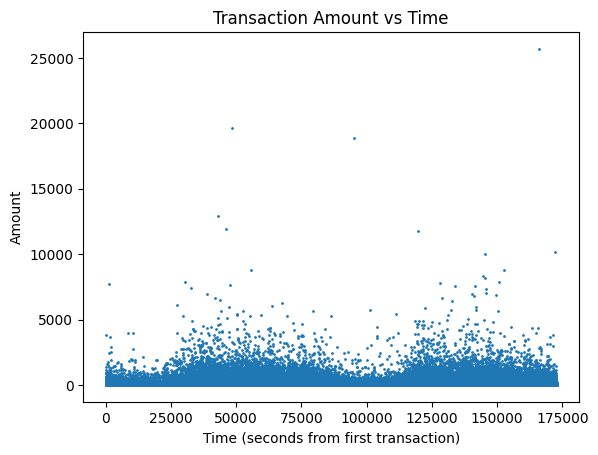

In [ ]:
plt.figure()
plt.scatter(df["Time"], df["Amount"], s=1)
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Amount")
plt.title("Transaction Amount vs Time")
plt.show()

Nie widać na wykresie zależności fraudu od czasu

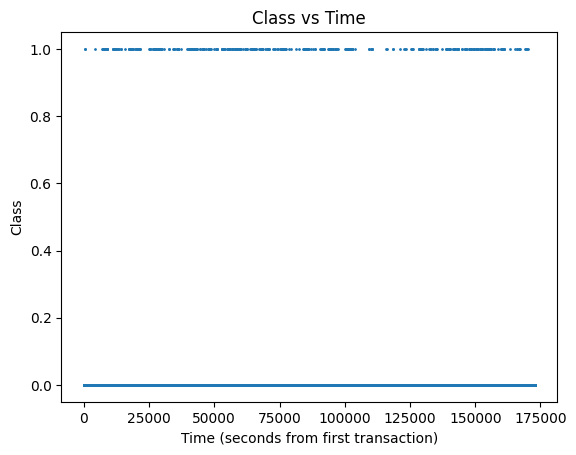

In [ ]:
plt.figure()
plt.scatter(df["Time"], df["Class"], s=1)
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Class")
plt.title("Class vs Time")
plt.show()

### To samo na jednym wykresie

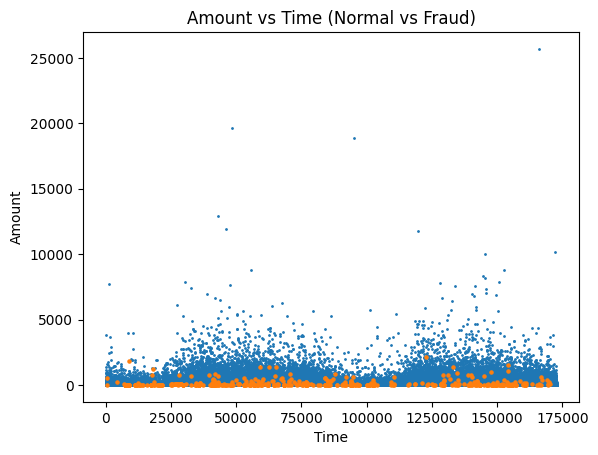

In [ ]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

plt.figure()
plt.scatter(normal["Time"], normal["Amount"], s=1)
plt.scatter(fraud["Time"], fraud["Amount"], s=5)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Amount vs Time (Normal vs Fraud)")
plt.show()

---
Jeszcze raz rozkład - dystrybucja per godzina

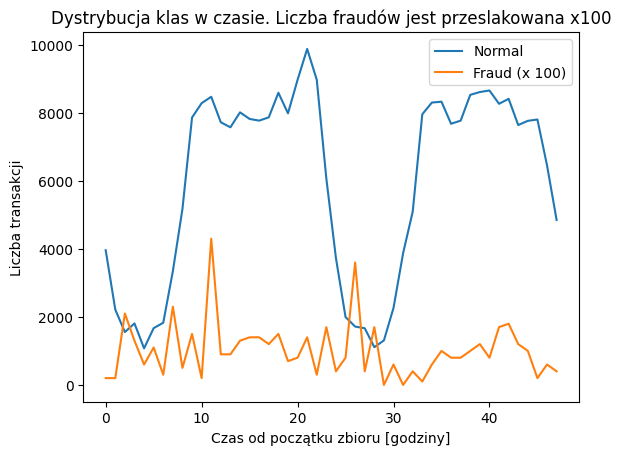

In [ ]:
# binowanie czasu: 1 godzina = 3600 sekund
df["time_bin"] = (df["Time"] // 3600).astype(int)

# zliczanie transakcji w binach
counts = (
    df.groupby(["time_bin", "Class"])
      .size()
      .unstack(fill_value=0)
)

plt.figure()
plt.plot(counts.index, counts[0], label="Normal")
plt.plot(counts.index, counts[1]*100, label="Fraud (x 100)")
plt.xlabel("Czas od początku zbioru [godziny]")
plt.ylabel("Liczba transakcji")
plt.title("Dystrybucja klas w czasie. Liczba fraudów jest przeslakowana x100")
plt.legend()
plt.show()

/tmp/ipython-input-3211313348.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


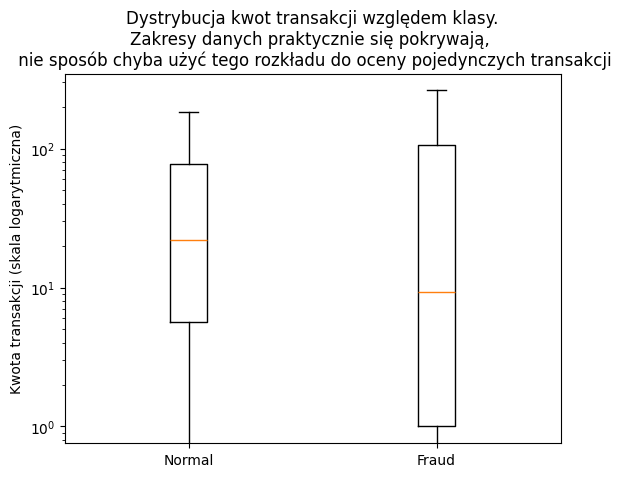

In [ ]:
normal = df[df["Class"] == 0]["Amount"]
fraud = df[df["Class"] == 1]["Amount"]

plt.figure()
plt.boxplot(
    [normal, fraud],
    labels=["Normal", "Fraud"],
    showfliers=False
)
plt.yscale("log")
plt.ylabel("Kwota transakcji (skala logarytmiczna)")
plt.title("""Dystrybucja kwot transakcji względem klasy.\nZakresy danych praktycznie się pokrywają, \n """
"""nie sposób chyba użyć tego rozkładu do oceny pojedynczych transakcji""")
plt.show()

/tmp/ipython-input-1639283633.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby("amount_bin")["Class"]


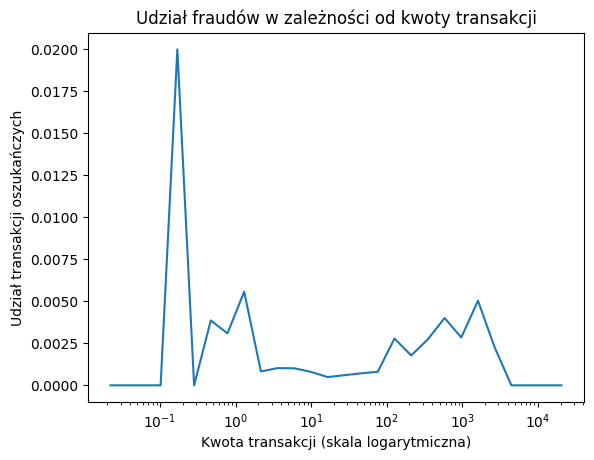

In [ ]:
# kopia robocza
df2 = df.copy()

# logarytmiczne biny kwoty
bins = np.logspace(np.log10(0.01), np.log10(df2["Amount"].max()), 30)
df2["amount_bin"] = pd.cut(df2["Amount"], bins=bins)

# liczenie udziału fraudów
ratio = (
    df2.groupby("amount_bin")["Class"]
       .mean()
)

# środek binu do osi X
x = [interval.mid for interval in ratio.index]

plt.figure()
plt.plot(x, ratio)
plt.xscale("log")
plt.xlabel("Kwota transakcji (skala logarytmiczna)")
plt.ylabel("Udział transakcji oszukańczych")
plt.title("Udział fraudów w zależności od kwoty transakcji")
plt.show()

## Udział fraudów w całej populacji to tylko 0.17% (!)

In [ ]:
dens = df[df["Class"] == 1].shape[0] / df[df["Class"] == 0].shape[0] * 100

f"{dens=:.2}%"

'dens=0.17%'

## Undersampling

Spróbuję się dowiedzieć, dokąd zaprowadzi mnie undersampling. Do skrajnie małej próbki Fraudów (492 rekordy) dolosowuję 492 rekordy Normal. Będę miał w ten sposób zbiór idealnie zbalansowany.

In [ ]:
fraud_df = df.loc[df['Class'] == 1]
fraud_df.shape

non_fraud_df = df.loc[df['Class'] == 0].sample(n=492, random_state=42)

(fraud_df.shape, non_fraud_df.shape)


((492, 32), (492, 32))

In [ ]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_bin
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,2


In [ ]:
non_fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_bin
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,-0.325347,-0.216435,0.084204,-1.054631,0.967932,0.601226,0.631117,0.295078,-0.136151,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0,22
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,0.821998,0.468322,-0.057550,0.573006,0.358688,-0.011633,-0.504570,0.722750,0.861541,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0,14
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,0.575866,-0.594037,1.097880,-0.338340,0.617523,-0.756390,0.535141,1.016704,2.133828,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0,15
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,-0.841133,-0.586472,-0.779620,-0.436671,0.747871,0.266437,0.703234,0.916719,-0.189967,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0,32
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,1.297531,-1.920966,1.885047,1.323225,-2.044482,1.317655,-0.441076,0.804104,-1.658339,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0,25


---
Nowy zbiór jest idealnie zrównoważony

---

In [ ]:
df_undersampled = pd.concat([fraud_df, non_fraud_df])
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

df_undersampled[df_undersampled["Class"] == 0].shape, df_undersampled[df_undersampled["Class"] == 1].shape

((492, 32), (492, 32))

### Macierze korelacji

#### Klasa 0 (Normal)

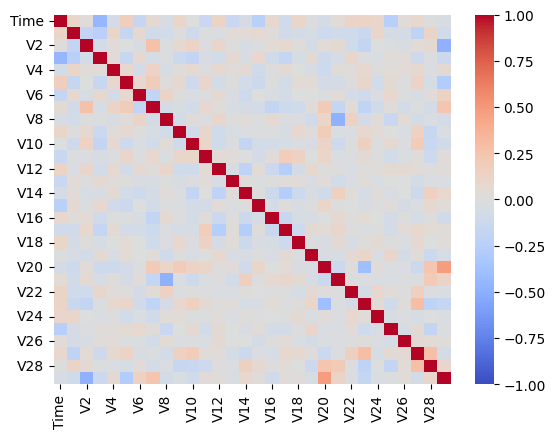

In [ ]:
corr_non_fraud = (
    df_undersampled[df_undersampled["Class"] == 0]
    .drop(columns=["Class", "time_bin"])
    .corr()
)


sns.heatmap(corr_non_fraud, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Klasa 1 (Fraud)

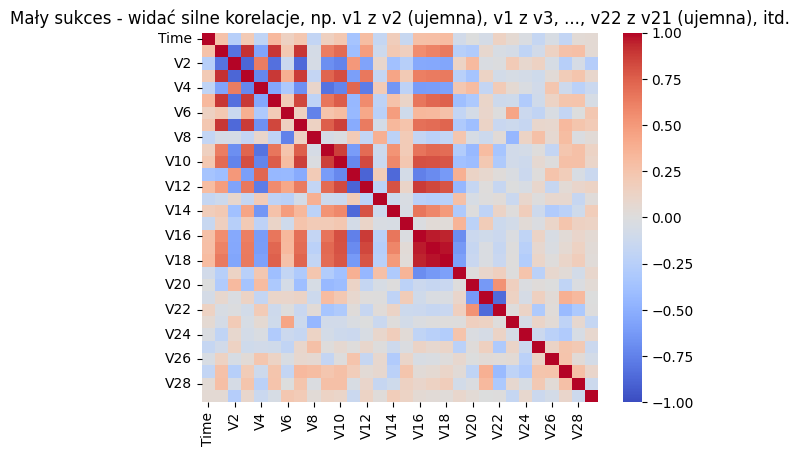

In [ ]:
corr_fraud = (
    df_undersampled[df_undersampled["Class"] == 1]
    .drop(columns=["Class", "time_bin"])
    .corr()
)

sns.heatmap(corr_fraud, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Mały sukces - widać silne korelacje, np. v1 z v2 (ujemna), v1 z v3, ..., v22 z v21 (ujemna), itd." )
plt.show()

#### Klasa 1 (Fraud)  - usunięcie silnie skorelowanych kolumn

Usuwam jedna kolumnę z pary kolumn silnie skorelowanych, |wsp. korelacji| >= 0.8

In [ ]:
corr_fraud[abs(corr_fraud) >= 0.8]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V1,NaN,1.000000,-0.819226,0.907875,NaN,0.894968,NaN,0.897609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,-0.819226,1.000000,-0.876904,NaN,-0.828391,NaN,-0.862983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,NaN,0.907875,-0.876904,1.000000,NaN,0.883689,NaN,0.882312,NaN,NaN,0.818243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.818853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,NaN,0.894968,-0.828391,0.883689,NaN,1.000000,NaN,0.839738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V7,NaN,0.897609,-0.862983,0.882312,NaN,0.839738,NaN,1.000000,NaN,NaN,0.859823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,NaN,NaN,NaN,NaN,-0.818853,NaN,NaN,NaN,NaN,1.000000,0.863966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Szukam kolumn skorelowanych >= 0.8

In [ ]:
threshold = 0.8

# maska górnego trójkąta (bez przekątnej)
upper_triangle = corr_fraud.where(
    np.triu(np.ones(corr_fraud.shape), k=1).astype(bool)
)

# pary silnie skorelowane
high_corr_pairs = [
    (col, row, upper_triangle.loc[row, col])
    for col in upper_triangle.columns
    for row in upper_triangle.index
    if abs(upper_triangle.loc[row, col]) >= threshold
]

high_corr_pairs

[('V2', 'V1', np.float64(-0.8192257999187472)),
 ('V3', 'V1', np.float64(0.9078750102143118)),
 ('V3', 'V2', np.float64(-0.8769036874612156)),
 ('V5', 'V1', np.float64(0.8949683303183888)),
 ('V5', 'V2', np.float64(-0.8283906321952419)),
 ('V5', 'V3', np.float64(0.8836893759062785)),
 ('V7', 'V1', np.float64(0.8976087819049479)),
 ('V7', 'V2', np.float64(-0.8629830837113919)),
 ('V7', 'V3', np.float64(0.8823124237585092)),
 ('V7', 'V5', np.float64(0.8397377735726811)),
 ('V9', 'V4', np.float64(-0.8188531773765154)),
 ('V10', 'V3', np.float64(0.8182431991732787)),
 ('V10', 'V7', np.float64(0.859822933970441)),
 ('V10', 'V9', np.float64(0.863965960937196)),
 ('V12', 'V10', np.float64(0.8343306922886242)),
 ('V12', 'V11', np.float64(-0.8897196039373826)),
 ('V14', 'V11', np.float64(-0.8620442721861779)),
 ('V16', 'V10', np.float64(0.8066370490481063)),
 ('V16', 'V12', np.float64(0.8817034646374772)),
 ('V17', 'V10', np.float64(0.8031092238256302)),
 ('V17', 'V12', np.float64(0.84279621253

Usuwam drugą kolumnę z pary. Świadomie rezygnuję ze sprawdzenia, która kolumna jest lepiej skorelowana z targetem

In [ ]:
cols_to_drop = set()

for col1, col2, corr_value in high_corr_pairs:
    cols_to_drop.add(col2)

cols_to_drop

{'V1',
 'V10',
 'V11',
 'V12',
 'V16',
 'V17',
 'V2',
 'V21',
 'V3',
 'V4',
 'V5',
 'V7',
 'V9'}

Usunięcie

In [ ]:
df_undersampled_reduced = df_undersampled.drop(columns=list(cols_to_drop))
df_undersampled_reduced.shape

(984, 19)

Obejrzenie i jeszcze raz macierz korelacji

In [ ]:
df_undersampled_reduced

,Time,V6,V8,V13,V14,V15,V18,V19,V20,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_bin
255545,157278.0,-0.544524,-0.074875,1.933232,-1.231701,0.336300,0.391021,-0.791486,-0.127858,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00,0,43
248296,153875.0,-2.335145,0.706362,-0.954361,-9.861372,-0.505329,1.795992,-1.085208,0.354773,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1,42
76163,56424.0,-0.761867,-0.430272,1.364419,0.242646,0.839773,-0.209113,-0.530747,0.914995,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00,0,15
239501,150139.0,-1.148650,0.433427,0.243483,-1.181669,0.004373,-1.710463,0.982729,-1.928527,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1,41
143336,85285.0,-2.099389,3.578780,0.251179,-11.608002,-0.351569,-3.583603,0.897402,0.135711,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,40662.0,-4.297177,0.342671,-1.135439,-10.787051,0.265456,0.994101,-0.688721,-0.108006,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1,11
142557,84789.0,-0.055123,0.195700,-1.521696,0.727242,0.166505,0.216016,-1.140376,0.634184,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1,23
271842,164776.0,-1.067379,-0.311473,-0.600555,0.643363,0.646478,-0.009001,-0.695012,-0.237873,0.832769,-0.026910,-0.020475,0.268850,-0.425449,-0.005599,-0.046730,42.80,0,45
239499,150138.0,0.290700,-2.679351,-0.982273,-4.691151,-0.693080,-0.064852,1.490329,0.532145,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00,1,41


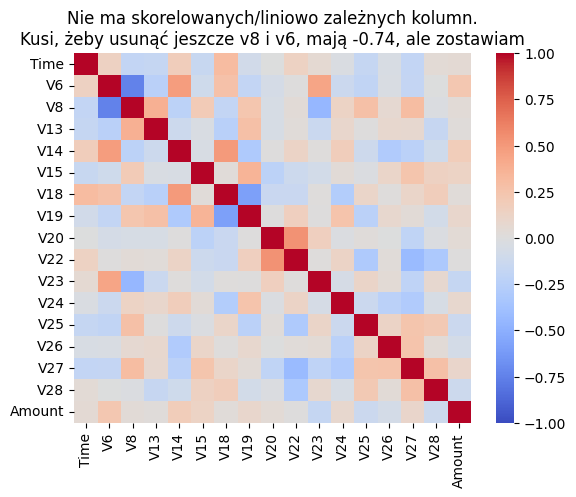

In [ ]:
corr_fraud_reduced = (
    df_undersampled_reduced[df_undersampled_reduced["Class"] == 1]
    .drop(columns=["Class", "time_bin"])
    .corr()
)

sns.heatmap(corr_fraud_reduced, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Nie ma skorelowanych/liniowo zależnych kolumn.\nKusi, żeby usunąć jeszcze v8 i v6, mają -0.74, ale zostawiam" )
plt.show()

# Redukcja wymiarów

Usuwam z oryginalnego zbioru skorelowane\liniowo zależne kolumny

In [ ]:
df_reduced = df.drop(columns=list(cols_to_drop))
df_reduced.shape

(284807, 19)

In [ ]:
df_reduced.describe()

,Time,V6,V8,V13,V14,V15,V18,V19,V20,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_bin
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.487313e-15,1.213481e-16,8.190001e-16,1.207294e-15,4.887456e-15,9.564149e-16,1.039917e-15,6.406204e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,25.845703
std,47488.145955,1.332271e+00,1.194353e+00,9.952742e-01,9.585956e-01,9.153160e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.184831
min,0.000000,-2.616051e+01,-7.321672e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-9.498746e+00,-7.213527e+00,-5.449772e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-7.682956e-01,-2.086297e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.000000
50%,84692.000000,-2.741871e-01,2.235804e-02,-1.356806e-02,5.060132e-02,4.807155e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.000000
75%,139320.500000,3.985649e-01,3.273459e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.008067e-01,4.589494e-01,1.330408e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.000000
max,172792.000000,7.330163e+01,2.000721e+01,7.126883e+00,1.052677e+01,8.877742e+00,5.041069e+00,5.591971e+00,3.942090e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.000000


Dla świętego spokoju :)

In [ ]:
df_reduced.isna().sum().max()

0

In [ ]:
df_reduced["Class"].value_counts()

,count
Class,
0,284315
1,492


# Modele ML na zredukowanych danych

## Wydzielenie cech i etykiet oraz podział na zbiory treningowy i testowy

Dalej działam na zbiorze df_reduced. Na jego podstawie buduję wektory cech oraz wektor etykiet, z których wydzielam zbiory treningowy i testowy.

In [ ]:
X = df_reduced.drop(columns=["Class"])
y = df_reduced["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train

,Time,V6,V8,V13,V14,V15,V18,V19,V20,V22,V23,V24,V25,V26,V27,V28,Amount,time_bin
265518,161919.0,4.024933,1.139880,0.061258,-0.066555,1.328702,0.141938,-0.451365,-0.134435,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,44
180305,124477.0,3.298697,0.674782,-0.405327,0.721068,-0.148445,-0.695698,-0.274411,-0.227279,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,34
42664,41191.0,1.956261,-5.037523,0.747777,0.122746,-1.723285,0.147255,0.004631,1.280856,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,11
198723,132624.0,-0.350339,0.010010,-0.468757,-0.195288,-0.638683,0.768237,0.257424,-0.490642,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,36
82325,59359.0,-0.147490,-0.113817,-0.782698,0.134659,-0.483007,1.597589,-0.082746,-0.275297,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,147710.0,0.395044,0.231591,-0.251486,0.062302,0.013795,0.739436,0.043943,-0.174051,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,41
85418,60764.0,1.303031,0.135561,-0.533295,-0.401809,0.771781,-2.623211,-1.241768,-0.225079,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,16
29062,35301.0,-0.370243,-0.026687,-0.547450,0.166727,-0.073930,-1.033061,-0.500426,-0.149402,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,9
13766,24413.0,-0.145844,-0.091833,2.119731,1.799882,-0.357245,0.483059,0.278512,-0.093783,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89,6


## Skalowanie

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN jako benchmark

### Przewidywania

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score


knn = KNeighborsClassifier(
    n_neighbors=10,
    p=2,
    weights="distance"
)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred, digits=5))


              precision    recall  f1-score   support

           0    0.99953   0.99996   0.99975     56864
           1    0.97260   0.72449   0.83041        98

    accuracy                        0.99949     56962
   macro avg    0.98606   0.86223   0.91508     56962
weighted avg    0.99948   0.99949   0.99945     56962



Wysokie wyniki dla Klasy 0 (Normal) są zrozumiałe; model mógłby zawsze wskazywać 0 i miałby dokładność 99.83 :)

Dla Klasy 1 (Fraud):
* precyzja 0.97
* czułość 0.72 (czyli przpuszczamy 28% prawdziwych fraudów)
* F1-score - później

**Skupiam się dalej w całej pracy (ML + DL) na szukaniu wysokiej czułości - to jest moja przewodnia metryka.**
Przy zachowaniu oczywiście sensownie dobrych pozostałych wskaźników.

### Próba dobrania lepszych parametrów w KNN

In [ ]:
from sklearn.metrics import recall_score

results = dict()

for neighbors in range(1, 20):

    knn = KNeighborsClassifier(
        n_neighbors=neighbors,
        p=2,
        weights="distance"
    )

    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    results[neighbors] = recall_score(y_test, y_pred)

In [ ]:
results

{1: 0.7755102040816326,
 2: 0.7755102040816326,
 3: 0.7653061224489796,
 4: 0.7653061224489796,
 5: 0.7551020408163265,
 6: 0.7755102040816326,
 7: 0.7346938775510204,
 8: 0.7244897959183674,
 9: 0.7346938775510204,
 10: 0.7244897959183674,
 11: 0.7244897959183674,
 12: 0.7142857142857143,
 13: 0.7142857142857143,
 14: 0.6938775510204082,
 15: 0.6836734693877551,
 16: 0.6836734693877551,
 17: 0.6836734693877551,
 18: 0.6836734693877551,
 19: 0.6938775510204082}

Co ciekawe, najwyższy recall jest dla 1, 2 i 6 sąsiadów. Sprawdzę więc pozostałe metryki dla tych liczebności sąsiadów.

In [ ]:
for neighbors in [1, 2, 6]:

    knn = KNeighborsClassifier(
        n_neighbors=neighbors,
        p=2,
        weights="distance"
    )

    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    print(f"{neighbors=}", classification_report(y_test, y_pred, digits=5), "\n", sep="\n")



neighbors=1
              precision    recall  f1-score   support

           0    0.99961   0.99984   0.99973     56864
           1    0.89412   0.77551   0.83060        98

    accuracy                        0.99946     56962
   macro avg    0.94687   0.88768   0.91516     56962
weighted avg    0.99943   0.99946   0.99944     56962



neighbors=2
              precision    recall  f1-score   support

           0    0.99961   0.99984   0.99973     56864
           1    0.89412   0.77551   0.83060        98

    accuracy                        0.99946     56962
   macro avg    0.94687   0.88768   0.91516     56962
weighted avg    0.99943   0.99946   0.99944     56962



neighbors=6
              precision    recall  f1-score   support

           0    0.99961   0.99996   0.99979     56864
           1    0.97436   0.77551   0.86364        98

    accuracy                        0.99958     56962
   macro avg    0.98699   0.88774   0.93171     56962
weighted avg    0.99957   0.99958 

### Wnioski

Lepszą precyzję (0.97436) oraz f1-score (0.86364) oferuje n=6.

### Wybór bazowych metryk dla wszystkich modeli

Zatem **baselinem** jest
* recall = 0.77551
* precision = 0.97436
* f1-score = 0.86364

---
Baselinowym ***modelem*** jest

```
knn = KNeighborsClassifier(
        n_neighbors=6,
        p=2,
        weights="distance"
    )
```

## Regresja logistyczna

In [ ]:
logreg = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Przewidywania

In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9648    0.9820     56864
           1     0.0417    0.8878    0.0797        98

    accuracy                         0.9647     56962
   macro avg     0.5208    0.9263    0.5308     56962
weighted avg     0.9982    0.9647    0.9805     56962



Model ma niezłą czułość (89%), ale fatalnie wygląda precyzja. Dzieje się tak dlatego, że balanced karze false positivy. Spróbuję stuningować threshlold

### Tuningowanie thresholdu

In [ ]:
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
thresholds = np.linspace(0.01, 0.99, 99)

results = dict()
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    results[t]={
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t, zero_division=0),
        "f1": f1_score(y_test, y_pred_t, zero_division=0),
    }



In [ ]:
pd.DataFrame(results)

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
precision,0.001869,0.002021,0.002235,0.002523,0.002864,0.003201,0.003605,0.004038,0.004432,0.004941,0.005481,0.006043,0.006542,0.007063,0.007675,0.008284,0.008926,0.009552,0.010216,0.010883,0.011592,0.012359,0.012789,0.013487,0.014281,0.015004,0.015773,0.016532,0.017313,0.018171,0.018770,0.019639,0.020779,0.021707,0.022727,0.023751,0.024815,0.025931,0.027069,0.028293,0.029412,0.030505,0.031659,0.033080,0.034292,0.035568,0.037132,0.038411,0.040055,0.041707,0.043370,0.044707,0.046400,0.047751,0.049115,0.051559,0.052956,0.055093,0.057143,0.058783,0.061516,0.064371,0.066256,0.068745,0.071607,0.074266,0.076717,0.080000,0.083739,0.087221,0.090431,0.092973,0.095028,0.099307,0.103118,0.106965,0.110398,0.113606,0.118457,0.123919,0.128358,0.133540,0.142149,0.150087,0.155797,0.163148,0.171371,0.180645,0.196721,0.217054,0.233983,0.251497,0.270968,0.285714,0.311787,0.345992,0.392157,0.435754,0.448980
recall,0.979592,0.979592,0.979592,0.979592,0.979592,0.969388,0.969388,0.959184,0.938776,0.938776,0.938776,0.938776,0.928571,0.918367,0.918367,0.918367,0.918367,0.918367,0.918367,0.918367,0.918367,0.918367,0.897959,0.897959,0.897959,0.897959,0.897959,0.897959,0.897959,0.897959,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.887755,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.877551,0.867347,0.867347,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.857143,0.836735,0.836735,0.816327,0.795918,0.673469
f1,0.003732,0.004034,0.004460,0.005032,0.005711,0.006381,0.007183,0.008042,0.008822,0.009831,0.010899,0.012010,0.012992,0.014018,0.015223,0.016420,0.017680,0.018908,0.020207,0.021511,0.022895,0.024390,0.025219,0.026574,0.028115,0.029515,0.031002,0.032466,0.033970,0.035620,0.036763,0.038428,0.040607,0.042377,0.044320,0.046264,0.048280,0.050391,0.052536,0.054838,0.056937,0.058983,0.061138,0.063783,0.066034,0.068396,0.071282,0.073635,0.076652,0.079670,0.082700,0.085127,0.088191,0.090574,0.093023,0.097395,0.099884,0.103677,0.107299,0.110186,0.114973,0.119944,0.123209,0.127502,0.132410,0.136943,0.141099,0.146633,0.152889,0.158672,0.163966,0.168133,0.171486,0.178423,0.184549,0.190687,0.196123,0.201170,0.208738,0.217172,0.223958,0.231806,0.244666,0.256334,0.264615,0.274637,0.286195,0.298401,0.320000,0.346392,0.367615,0.388889,0.411765,0.428571,0.454294,0.489552,0.529801,0.563177,0.538776


### Wnioski

Dla progu 0.01-0.05 model ma bardzo niską precyzja, ale wysoką czułość; w praktyce "wszystko oznacza jako Fraud".

Dla progu 0.98
* precyzja wynosi 0.44
* czułość 80%.

Wnioski
* Nie istnieje jedna hiperpłaszczyzna rozdzielająca skutecznie Normal i Fraud
* KNN jest lepszy, czyli Fraudy grupują się jednak jakoś - do zbadania później?

## Drzewa decyzyjne

### Przewidywania

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_proba = dt.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9993    0.9995    0.9994     56864
           1     0.6977    0.6122    0.6522        98

    accuracy                         0.9989     56962
   macro avg     0.8485    0.8059    0.8258     56962
weighted avg     0.9988    0.9989    0.9988     56962



Na pierwszy rzut oka obiecujące wyniki (0.6977 i 0.6122). Spróbujmy je polepszyć

### Próba dobrania lepszych parametrów depth i min_samples_leafs w drzewach

Najpierw znajdę optymalną głębokość i złożoność, później dostroję prawdopodobieństwo

In [ ]:
results = dict()

for depth in [3, 5, 8, 12, None]:
    for leaf in [10, 50, 100]:
        dt = DecisionTreeClassifier(
            class_weight="balanced",
            max_depth=depth,
            min_samples_leaf=leaf,
            random_state=42
        )
        dt.fit(X_train, y_train)

        y_proba = dt.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)

        results[depth, leaf] = {
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
        }

In [ ]:
pd.DataFrame(results)

3                             5                       \
                10        50        100       10        50        100   
precision  0.047461  0.047461  0.046688  0.056834  0.059151  0.056780   
recall     0.877551  0.877551  0.877551  0.857143  0.867347  0.867347   

                 8                             12                      \
                10        50        100       10        50        100   
precision  0.048014  0.045634  0.043614  0.119225  0.085561  0.069364   
recall     0.826531  0.826531  0.857143  0.816327  0.816327  0.857143   

                NaN                      
                10        50        100  
precision  0.382353  0.121396  0.081809  
recall     0.795918  0.816327  0.867347

Najlepszy zestaw parametrów dostaliśmy dla depth=None i min_leafs=10. Wynik to
* precyzja = 0.38 (słabo, ale obiecująco)
* czułość = 80% - obiecująco

### Szukanie najlepszego progu dla prawdopodobieństwa

Wybieram najbardziej obiecujący model
* max_depth=None,
* min_samples_leaf=10

i testuję najlepszy próg.

In [ ]:
best_dt = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=None,
    min_samples_leaf=10,
    random_state=42
)
best_dt.fit(X_train, y_train)

y_proba = best_dt.predict_proba(X_test)[:, 1]


thresholds = np.linspace(start=0.01, stop=1, num=100)

results = dict()
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    results[t] = {
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t, zero_division=0),
        "f1": f1_score(y_test, y_pred_t, zero_division=0),
    }


In [ ]:
pd.DataFrame(results)

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
precision,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.382353,0.388060,0.506494,0.961538
recall,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.510204
f1,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.516556,0.521739,0.619048,0.666667


In [ ]:
np.unique(y_proba)

array([0.        , 0.97139428, 0.98464915, 0.98464915, 0.98464915,
       0.98717481, 0.99084595, 0.99311872, 0.99311872, 0.99397369,
       0.99440173, 0.99597437, 0.99597437, 0.99626084, 0.99697774,
       0.99712124, 0.99740837, 0.99769567, 0.9984626 , 0.9988465 ,
       0.99903857, 0.99905603, 0.99925816, 0.99935083, 0.99980757,
       0.99982681, 1.        ])

Zagęszczamy poszukiwania, bo zmiany są dopiero od 0.98. Użyję y_proba jako progów

In [ ]:
best_dt = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=None,
    min_samples_leaf=10,
    random_state=42
)
best_dt.fit(X_train, y_train)

y_proba = best_dt.predict_proba(X_test)[:, 1]


thresholds = np.linspace(start=0.99, stop=1, num=100)

results = dict()
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    results[t] = {
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t, zero_division=0),
        "f1": f1_score(y_test, y_pred_t, zero_division=0),
    }


In [ ]:
pd.DataFrame(results)

,0.990000,0.990101,0.990202,0.990303,0.990404,0.990505,0.990606,0.990707,0.990808,0.990909,0.991010,0.991111,0.991212,0.991313,0.991414,0.991515,0.991616,0.991717,0.991818,0.991919,0.992020,0.992121,0.992222,0.992323,0.992424,0.992525,0.992626,0.992727,0.992828,0.992929,0.993030,0.993131,0.993232,0.993333,0.993434,0.993535,0.993636,0.993737,0.993838,0.993939,0.994040,0.994141,0.994242,0.994343,0.994444,0.994545,0.994646,0.994747,0.994848,0.994949,0.995051,0.995152,0.995253,0.995354,0.995455,0.995556,0.995657,0.995758,0.995859,0.995960,0.996061,0.996162,0.996263,0.996364,0.996465,0.996566,0.996667,0.996768,0.996869,0.996970,0.997071,0.997172,0.997273,0.997374,0.997475,0.997576,0.997677,0.997778,0.997879,0.997980,0.998081,0.998182,0.998283,0.998384,0.998485,0.998586,0.998687,0.998788,0.998889,0.998990,0.999091,0.999192,0.999293,0.999394,0.999495,0.999596,0.999697,0.999798,0.999899,1.000000
precision,0.506494,0.506494,0.506494,0.506494,0.506494,0.506494,0.506494,0.506494,0.506494,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.527027,0.561151,0.561151,0.561151,0.561151,0.561151,0.561151,0.561151,0.561151,0.561151,0.598425,0.598425,0.598425,0.598425,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.595238,0.627119,0.627119,0.649123,0.649123,0.649123,0.649123,0.649123,0.649123,0.649123,0.649123,0.660714,0.691589,0.691589,0.691589,0.782609,0.782609,0.782609,0.780220,0.780220,0.780220,0.780220,0.780220,0.780220,0.780220,0.835294,0.835294,0.835294,0.835294,0.865854,0.865854,0.927536,0.927536,0.966667,0.966102,0.966102,0.966102,0.966102,0.966102,0.961538,0.961538
recall,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.795918,0.775510,0.775510,0.775510,0.775510,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.765306,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.755102,0.734694,0.734694,0.734694,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.724490,0.653061,0.653061,0.591837,0.581633,0.581633,0.581633,0.581633,0.581633,0.510204,0.510204
f1,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.634146,0.658228,0.658228,0.658228,0.658228,0.658228,0.658228,0.658228,0.658228,0.658228,0.675556,0.675556,0.675556,0.675556,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.669643,0.685185,0.685185,0.698113,0.698113,0.698113,0.698113,0.698113,0.698113,0.698113,0.698113,0.704762,0.721951,0.721951,0.721951,0.757895,0.757895,0.757895,0.751323,0.751323,0.751323,0.751323,0.751323,0.751323,0.751323,0.775956,0.775956,0.775956,0.775956,0.788889,0.788889,0.766467,0.766467,0.734177,0.726115,0.726115,0.726115,0.726115,0.726115,0.666667,0.666667


Ponieważ zależy mi przede wszystkim na czułości, więc wybieram próg 0.998990, przy którym
* precyzja = 0.865854
* czułość = 0.724490
* f1_score = 0.788889

### Wnioski

Najlepszym znalezionym przeze mnie drzewem decyzyjnym jest

```
best_dt = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=None,
    min_samples_leaf=10,
    random_state=42
)
```

z progiem decyzyjnym 0.998990, przy którym
* precyzja = 0.865854
* czułość = 0.724490

## Las losowy

### Przewidywania

In [ ]:
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
y_proba = rf.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9994    1.0000    0.9997     56864
           1     0.9697    0.6531    0.7805        98

    accuracy                         0.9994     56962
   macro avg     0.9845    0.8265    0.8901     56962
weighted avg     0.9994    0.9994    0.9993     56962



Obiecujące wyniki - precyzja = 0.97 i czułość = 0.66.

### Próba dobrania lepszych parametrów depth i min_samples_leaf w lesie losowym

In [ ]:
results = dict()

for depth in [None, 10, 20, 30]:
    for leaf in [1, 10, 50, 100]:
        rf = RandomForestClassifier(
            n_estimators=200,
            max_depth=depth,
            min_samples_leaf=leaf,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)

        y_proba = rf.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)

        results[depth, leaf]= {
            "precision": precision_score(y_test, y_pred),
            "recall": recall_score(y_test, y_pred),
            "f1_score": f1_score(y_test, y_pred),
            "roc_auc": roc_auc_score(y_test, y_proba)
        }


In [ ]:
pd.DataFrame(results)

### Wnioski

Biorę depth = 20 i leaf = 10; wtedy
* precision = 0.814433
* czułość = 0.806122
* f1_score = 0.810256

ROC_AUC wynosi 97%, co świadczy o braku overfiffingu.

```
RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=10,
    class_weight="balanced",
    n_estimators=200,
    random_state=42
)
```

Czyli wykrywam 80% Fraudów i jednocześnie 8 na 10 zgłoszonych Fraudów to faktycznie Fraudy.

Obserwacja: recall i precyzja są jakby ujemnie skorelowane; wzrost recallu powoduje spadek precyzji i na odwrót.

***Do tej pory najlepszy model :)***

## Gradient Boosting

### Przewidywania

In [ ]:
# wagi próbek (balanced) - analog do class_weight="balanced"
w0 = 1.0
w1 = (y_train.value_counts()[0] / y_train.value_counts()[1])  # ile razy klasa 0 jest częstsza
sample_weight = np.where(y_train == 1, w1, w0)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train, sample_weight=sample_weight)

y_proba = gb.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

### Próba poprawienia wyników

In [ ]:
results = []

for max_depth in [2, 3]:
    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=max_depth,
        subsample=1.0,
        random_state=42
    )
    gb.fit(X_train, y_train, sample_weight=sample_weight)

    y_proba = gb.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    results.append({
        "max_depth": max_depth,
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_proba)
    })


In [ ]:
df_gb = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
df_gb

In [ ]:
thresholds = np.linspace(0.5, 0.99, 50)
rows = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    rows.append({
        "threshold": t,
        "precision": precision_score(y_test, y_pred_t, zero_division=0),
        "recall": recall_score(y_test, y_pred_t, zero_division=0),
        "f1": f1_score(y_test, y_pred_t, zero_division=0)
    })


In [ ]:
df_thr_gb = pd.DataFrame(rows)
df_thr_gb.sort_values("f1", ascending=False).head(10)

### Wnioski

Najlepszym znalezionym przeze mnie Gradient Boostingiem jest model dający wyniki na poziomie
* precyzja = 0.571429
* czułość = 0.734694
* f1_score = 0.642857


```
gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.05,
        max_depth=3,
        subsample=1.0,
        random_state=42
    )
```

## Wnioski odnośnie do zastosowanych modeli uczenia maszynowego

In [ ]:
results = [
    {"model": "Najbliżsi sąsiedzi", "precyzja": 0.97436, "czułość": 0.77551, "f1": 0.86364},
    {"model": "Regresja logistyczna", "precyzja": 0.865854, "czułość": 0.724490, "f1": 0.788889},
    {"model": "Drzewa decyzyjne", "precyzja": 0.865854, "czułość": 0.724490, "f1": 0.788889},
    {"model": "Las losowy", "precyzja": 0.814433, "czułość": 0.806122, "f1": 0.810256},
    {"model": "Gradient boosting", "precyzja": 0.571429, "czułość": 0.734694, "f1": 0.642857},

]

results = pd.DataFrame(results).sort_values(["czułość", "precyzja"], ascending=[False, False])
results

Chociaż najlepszą czułością i precyzją wykazuje się Las losowy, jednak precyzja na poziomie 81% spowoduje masę błędów I stopnia, które będzie należało obsłużyć.
Chcę zwrócić uwagę na metodę najbliższych sąsiadów, która osiągnęła czułość tylko o 3 p. procentowe niższą od lasu losowego, natomiast oferuje nieosiągalną dla pozostałych metod precyzję na poziomie 97%. Biorąc pod uwagę tylko metryki i nie przejmując się wydajnością czy skalowalnością modeli, ***rekomendowałbym wybór metody najbliższych sąsiadów*** i próbę poprawienia jej metryk.


# Sieci neuronowe

## Przewidywania

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

### Early stopping - wspólny dla wszystkich modeli

In [ ]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

### Krzywe uczenia

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty\nŁadnie zbiega")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja\nŁadnie zbiega")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość\nŁadnie zbiega")
plt.legend()
plt.show()

### Wyniki (95%/73%)

* Precision = 0.9481
* Recall = 0.7332
* val_Precision = 0.9394
* val_Recall = 0.7470

Pierwszy model, 95% precyzji (94% na zbiorze walidacyjnym), czułość 73% (74% na walidacyjnym)

## Próba zbudowania bogatszego modelu w celu polepszenia recall

Przeprowadziłem kilkanaście prób dodając kolejne warstwy i/lub dodając neurony w warstwach. Zauwałyłem znaczny spadek precyzji (nawet poniżej 90% wobec 94% dla pierwszego modelu) przy mniej więcej stałym recall (ok. 75% niezależnie od ilości parametrów).

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

### Próba znalezienia prostej sieci, ale lepszej od wyjściowej

#### 3 x 64, dropuot 30% (90%/79%)

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

#### 4 x 64, dropout 30% (85%/76%)

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

#### 3 x 96, dropout 30% (92%/78%)

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(96, activation="relu"),
    Dropout(0.30),
    Dense(96, activation="relu"),
    Dropout(0.30),
    Dense(96, activation="relu"),
    Dropout(0.30),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

#### 3 * 112, dropout 30% (87%/71%)

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(112, activation="relu"),
    Dropout(0.3),
    Dense(112, activation="relu"),
    Dropout(0.3),
    Dense(112, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

#### 4 x 96, dropout 30% (88%/69%)

In [ ]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(96, activation="relu"),
    Dropout(0.3),
    Dense(96, activation="relu"),
    Dropout(0.3),
    Dense(96, activation="relu"),
    Dropout(0.3),
    Dense(96, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Precision", "Recall"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.title("Krzywa uczenia – funkcja straty")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Precision"], label="train precision")
plt.plot(history.history["val_Precision"], label="val precision")
plt.xlabel("Epoka")
plt.ylabel("Precision")
plt.title("Krzywa uczenia – precyzja")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["Recall"], label="train recall")
plt.plot(history.history["val_Recall"], label="val recall")
plt.xlabel("Epoka")
plt.ylabel("Recall")
plt.title("Krzywa uczenia – czułość")
plt.legend()
plt.show()

## Wnioski odnośnie do sieci neuronowych

Wyjściowa sieć (dwie warstwy: 64 i 32 neurony, dropout 30%) dała precyzję i czułość na poziomie 95% i 73%. Sieć 3 x 96 neuronów, dropout również 30%, dała 92% precyzji i 78% czułości. Widać tu swojego rodzaju trade-off - nastąpił "transfer" punktów procentowych z precyzji do czułości.
Dodawanie nowych warst lub neuronów w warstwach powoduje pogorszenie metryk.

***Rekomendowałbym wybór sieci 3x96***, ponieważ ma większą czułość.

# Wnioski końcowe

Poniżej zebrane wyniki dla ML i NN. Najlepiej prezentuje się ***las losowy***.

In [ ]:
results = [
    {"model": "Najbliżsi sąsiedzi", "czułość": 0.77551, "precyzja": 0.97436, "f1": 0.86364},
    {"model": "Regresja logistyczna", "czułość": 0.724490, "precyzja": 0.865854, "f1": 0.788889},
    {"model": "Drzewa decyzyjne", "czułość": 0.724490, "precyzja": 0.865854, "f1": 0.788889},
    {"model": "Las losowy", "czułość": 0.806122, "precyzja": 0.814433, "f1": 0.810256},
    {"model": "Gradient boosting", "czułość": 0.734694, "precyzja": 0.571429, "f1": 0.642857},
    {"model": "Sieć neuronowa", "czułość": 0.7332, "precyzja": 0.9481, "f1": None},
]

results = pd.DataFrame(results).sort_values(["czułość", "precyzja"], ascending=[False, False])
results
